# This jupyter notebook is prepared by Matthias Rathbun.

# 1. Load Data and perform general EDA 
<ol type="I">
<li>import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)</li>
<li>import the data to a dataframe and show the count of rows and columns (1 pt)</li>
<li>Show the top 5 and last 5 rows (1 pt)</li>
<li>call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)</li>
<ol type="1">
<li>Explain in words about the description of any two variables (1 pt)</li>
</ol>
<li>Show any missing value analysis  (1 pt)</li>
<li> Plot various scatter plots to understand the data:
<ol type="I">
<li>Yearly amount Spent vs Time on Website</li>
<li>Yearly amount Spent vs Time on App</li>
<li>Length of membership vs Time on App</li>
</li>
<li>Generate sns pairplot. Based on the plots, what feature is mostly correlated with the yearly amount spent?</li>
<li>Also, plot sns heatmpa based on correlation with annot=True and discuss which columns must be removed based on that and which column is mostly interesting and related to Yearly Amount Spent?</li>
<li>Generate a scatter plot with the interesting column you found in the last step against the Yearly Amount Spent</li>
</ol>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("ecommarce.csv", index_col = 0)
df.shape

(500, 8)

In [3]:
df.head()

,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",3544288738428794,35.497268,13.655651,40.577668,4.582621,588.951054
1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",6546228325389133,32.926272,12.109461,38.268959,3.164034,393.204933
2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",4406395951712628314,34.000915,12.330278,38.110597,4.604543,488.547505
3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",30334036663133,35.305557,14.717514,37.721283,3.620179,582.852344
4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",3582080469154498,34.330673,13.795189,38.536653,4.946308,600.406092


In [4]:
df.tail()

,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,xskz@gwj.com,"7083 Wallace Rest\nNew Trevor, NM 70240",30206742023085,34.237660,14.566160,37.417985,4.246573,574.847438
496,awrc@iok.com,"663 Christopher Garden\nLake Carrieberg, PA 70796",6011536844623717,35.702529,12.695736,38.190268,4.076526,530.049004
497,pndt@jyr.com,"1555 Chen Road\nBergerchester, NH 46418",4086276267550896697,33.646777,12.499409,39.332576,5.458264,552.620145
498,zvtz@onj.com,"5568 Robert Station Apt. 030\nTurnerstad, GA 9...",36218092488069,34.322501,13.391423,37.840086,2.836485,457.469510
499,phqb@nlg.com,"424 Mark Junctions\nDarrellchester, TX 09088",5427200269739116,34.715981,13.418808,36.771016,3.235160,498.778642


In [5]:
df.describe()

,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.706324e+17,34.053194,13.052488,38.060445,4.033462,500.314038
std,1.235588e+18,0.992563,0.994216,1.010489,0.999278,79.314782
min,5.018057e+11,30.532429,9.508152,34.913847,0.769901,257.670582
25%,3.683275e+13,33.341822,12.388153,37.349257,3.430450,446.038277
50%,3.513612e+15,34.082008,12.983231,38.069367,4.033975,499.887875
75%,4.777131e+15,34.711985,13.753850,38.716432,4.626502,550.313828
max,4.959148e+18,37.139662,16.126994,41.005182,7.422689,766.518462


Credit card seems to be credit card number, so any information about distributions carries no meaning.
The 4 temporal variables Avg Session Length, Time on app, Time on Website, Length of Membership will be worth looking at as predictors of the Yearly amount spent value.

<AxesSubplot:>

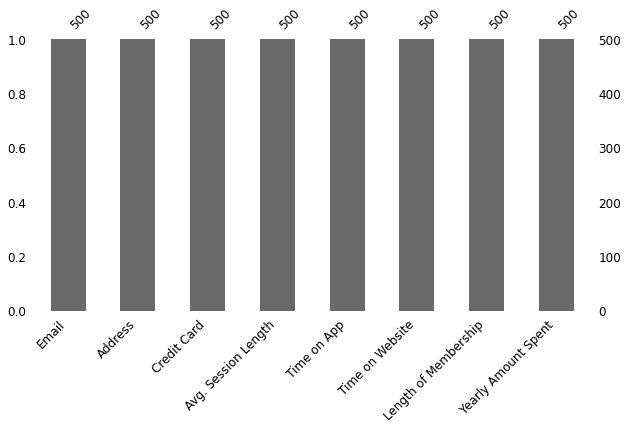

In [6]:
msno.bar(df, figsize=(10,5), fontsize=12)

This implies no missing values

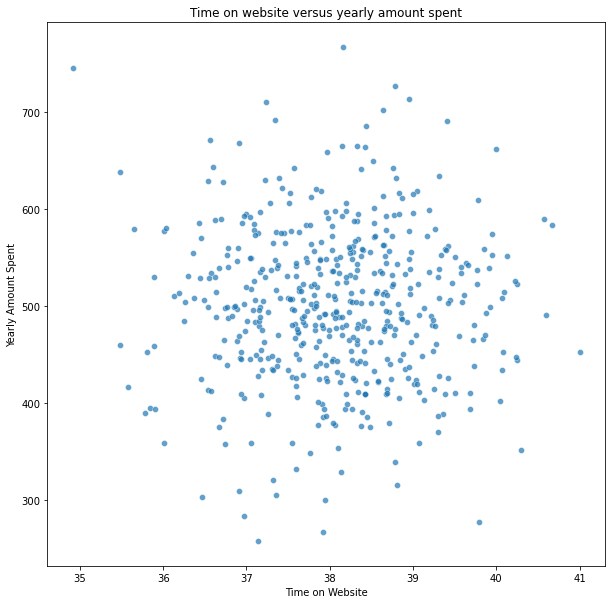

In [7]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "Time on Website", y = "Yearly Amount Spent", alpha = 0.7).set(title = "Time on website versus yearly amount spent")
plt.show()

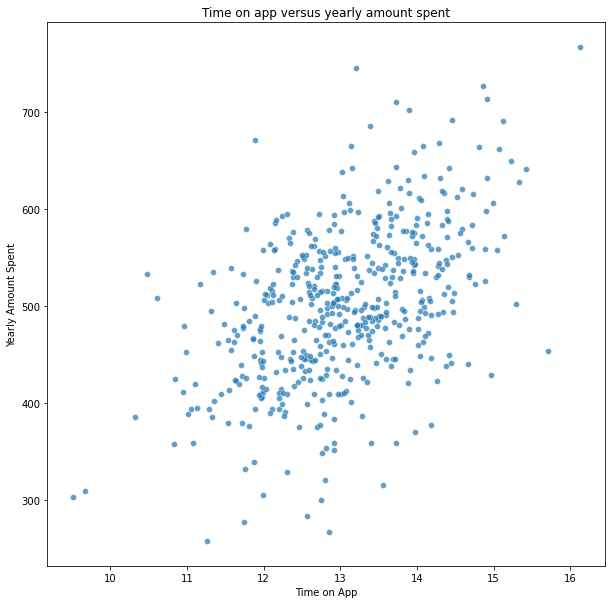

In [8]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "Time on App", y = "Yearly Amount Spent", alpha = 0.7).set(title = "Time on app versus yearly amount spent")
plt.show()

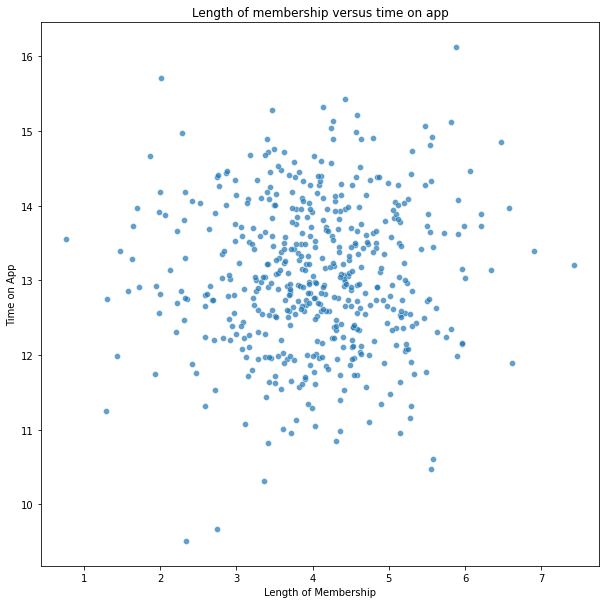

In [9]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "Length of Membership", y = "Time on App", alpha = 0.7).set(title = "Length of membership versus time on app")
plt.show()

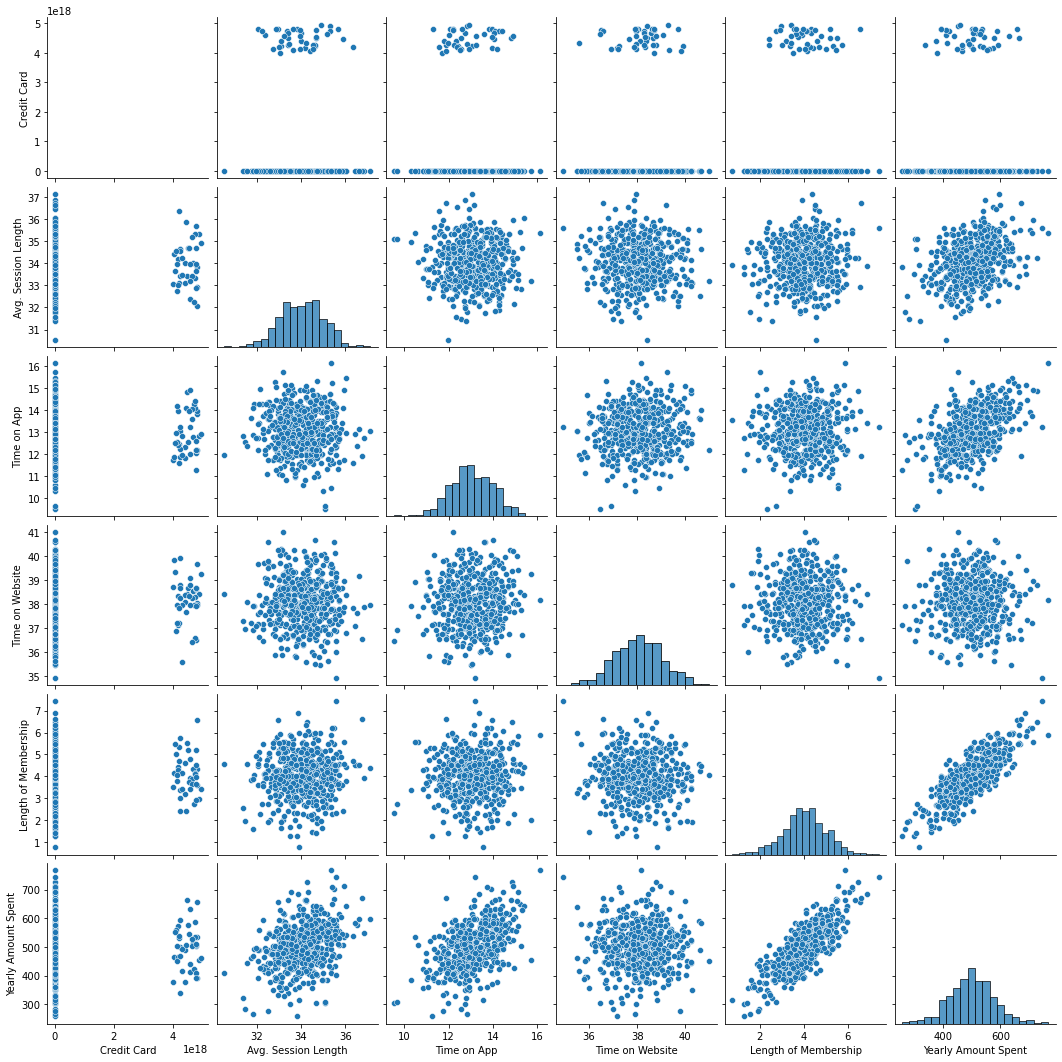

In [10]:
sns.pairplot(df)

Length of Membership is most correlated with Yearly amount spent.

[Text(0.5, 1.0, 'Correlation Matrix')]

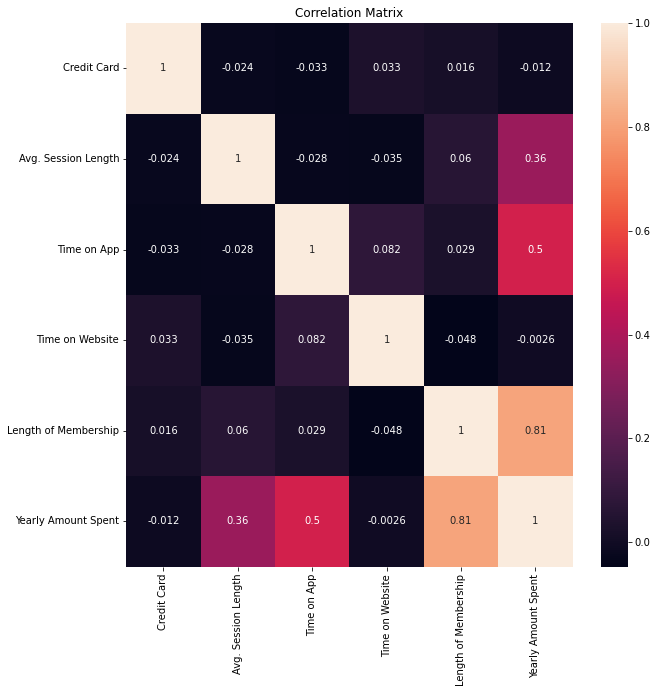

In [11]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True).set(title = "Correlation Matrix")

It is clear that Credit Card and Time on Website should be removed from the dataset as there is no correlation at all between the two. Average Session length and Time on App have slight positive correlation but appear to be noise, but it is clear that Length of membership is the most related to yearly ammount spent. Non Numerical Columns should also be removed as email cannot predict yearly amount spent. Physical address could if it was region based, but that is beyond the scope of this dataset as there are not enough samples to check if this persists so it also should be dropped. <br>

Note: Time on Website wont be dropped as it is in the instructions not to drop it.

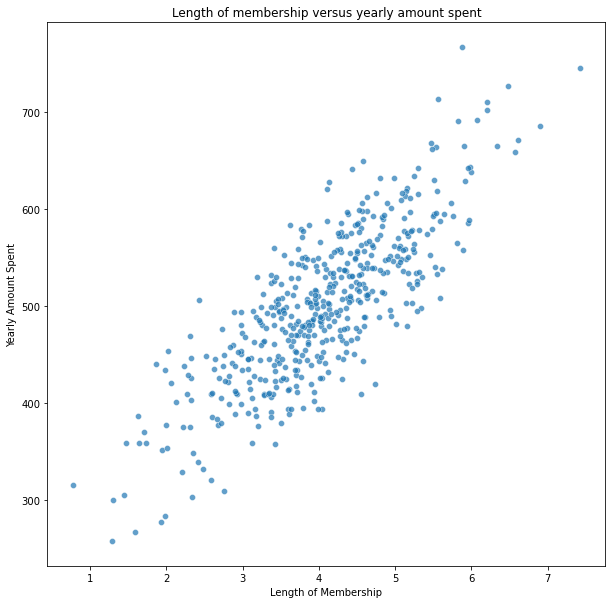

In [12]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "Length of Membership", y = "Yearly Amount Spent", alpha = 0.7).set(title = "Length of membership versus yearly amount spent")
plt.show()

# 2 Feature Selection and Pre-processing
Based on the EDA and null analysis, drop the unnecessary columns for the regression

In [13]:
df_clean = df.drop(columns = ["Email", "Address", "Credit Card"])

# 3 X/Y and Training/Test Split
Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 101 \\
As we will be doing gradient descent as well as some other regression technique, scaling the data set is important. So, use sklearn's StandardScaler for scalling the X of training and test sets. But don't do it for y(target) train and test. [For help, you can see the answer for this question: https://stackoverflow.com/questions/38780302/predicting-new-data-using-sklearn-after-standardizing-the-training-data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_clean.iloc[:, 0:4].values
y = df_clean.iloc[:, 4:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# 4 Training Linear Model using SKLearn's LinearRegression 
<ol type="I">
<li>Train a linear model using Sklearn''s LinearRegression (example in the linear regression slide/colab links in webcourses)</li>
<li>After training, show the coefficients and intercept</li>
<li>Predict for the test data </li>
<li>Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis </li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics) </li>
<li>Interpretation: Interpret the coefficient and which coefficient belongs to 
which feature and based on that explain any strategy that should help the business</li>
</ol>

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
print("Best value of theta:",reg.intercept_,reg.coef_,sep='\n')

Best value of theta:
[500.53166775]
[[25.76252659 38.32855202  0.19220992 61.17355707]]


In [17]:
y_pred = reg.predict(X_test)

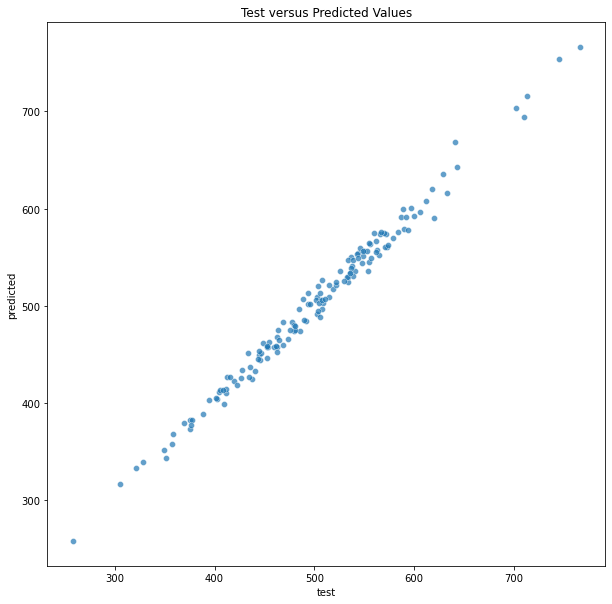

In [18]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
y_test = y_test[:,0]
y_pred = y_pred[:,0]
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred)
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

Coeffiecients are [25.76252659 38.32855202  0.19220992 61.17355707], which correspond to Avg. Session Length, Time on App, Time on Website, and Length of Membership in that order. As predicted, Length of membership has the biggest effect on the model while Time on Webside has a insignificant effect. The other two have some effect, but much less than Length of membership.

# 5 Normal Equation 
(while solving this, you might need to convert your dataframe into various different data structures such as to_numpy(), might need to reshape, perform Transpose, add x0 columns, etc. I would recommend you to see the colab link I have shown you in the class and try to compare the shape of x and y and their data to get an idea during this process. Also, the code and discussion in the slide will help. \\
<ol type="I">
<li>Implement Normal Equation and find best_theta values based on the training set</li>
<li>Display the theta values. Are they very close to the sklearn's linear regression?</li>
<li>Prepare the test set before prediction</li>
<li>Perform prediction for the test set</li>
<li>Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
<li>What is the limitation of using the Normal equation for regression?</li>
</ol>

In [20]:
X1_train = X_train[:,0]
X2_train = X_train[:,1]
X3_train = X_train[:,2]
X4_train = X_train[:,3]
X1_test = X_test[:,0]
X2_test = X_test[:,1]
X3_test = X_test[:,2]
X4_test = X_test[:,3]
m = len(X1_train)
n = len(X1_test)
X_train_bias = np.ones((m,1))
X_test_bias = np.ones((n,1))
X1_train = np.reshape(X1_train, (m,1))
X2_train = np.reshape(X2_train, (m,1))
X3_train = np.reshape(X3_train, (m,1))
X4_train = np.reshape(X4_train, (m,1))
X1_test = np.reshape(X1_test, (n,1))
X2_test = np.reshape(X2_test, (n,1))
X3_test = np.reshape(X3_test, (n,1))
X4_test = np.reshape(X4_test, (n,1))
XB_train = np.concatenate((X_train_bias, X1_train, X2_train, X3_train, X4_train), axis = 1)
XB_test = np.concatenate((X_test_bias, X1_test, X2_test, X3_test, X4_test), axis = 1)
XB_train_T = np.transpose(XB_train)
XB_test_T = np.transpose(XB_test)
XB_train_T_dot_XB_train = XB_train_T.dot(XB_train)
XB_test_T_dot_XB_test = XB_test_T.dot(XB_test)
train_theta = np.linalg.inv(XB_train_T_dot_XB_train).dot(XB_train_T.dot(y_train[:,0]))
print("Theta 1: {}\nTheta 2: {}\nTheta 3: {}\nTheta 4: {}".format(train_theta[0], train_theta[1], train_theta[2], train_theta[3]))

Theta 1: 500.5316677457303
Theta 2: 25.762526589451966
Theta 3: 38.32855202493705
Theta 4: 0.1922099219945146


These values are very close except for theta 1, which is much higher than in the sklearn

In [21]:
test_theta = np.linalg.inv(XB_test_T_dot_XB_test).dot(XB_test_T.dot(y_test))
print("Theta 1: {}\nTheta 2: {}\nTheta 3: {}\nTheta 4: {}".format(test_theta[0], test_theta[1], test_theta[2], test_theta[3]))
y_pred=XB_test.dot(test_theta)

Theta 1: 499.8832024429829
Theta 2: 24.902924321938286
Theta 3: 38.75765230036739
Theta 4: 0.7744068226727872


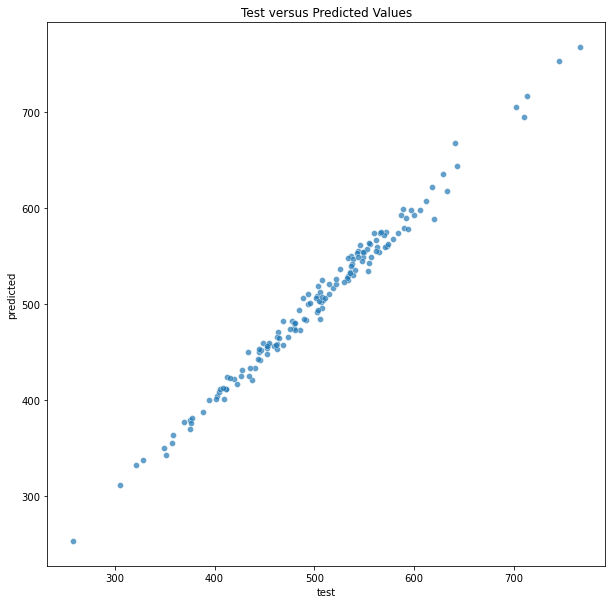

In [22]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred)
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 7.091599857199494
MSE: 77.06141626933221
RMSE: 8.77846320658304
R_squared: 0.9893837013182971


A transpose doted by A is O(N Cubed) and is expensive to run with large datasets.

# 6 Batch Gradient Descent
<ol type="I">
<li>Implement Batch Gradient Descent based on the way we have learned in the class (See sample code form pdf). You can play with eta and n_iterations and should set to reasonable eta and number of iterations so that you can get the thetas close to Normal equation's theta</li>
<li>Display the theta values. Are they very close to the sklearn's linear regression?</li>
<li>Also plot step number (in x-axis) against the cost(y axis). See an example from this colab link : https://colab.research.google.com/drive/19_UoIFfIBx-nofDFs7Pw7ZB8gVw5yQLe?usp=sharing (Links to an external site.)</li>
<li>Perform Prediction for the test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
<li>Short Question: How do derivatives help in the process of gradient descent?</li>
<li>Short Question: What are the benefits and the limitations of using batch gradient descent? </li>
</ol>

In [24]:
cost_list = []
epoch_list = []
predicted_list = []


eta = 0.005  # learning rate
n_iterations = 500

theta = np.random.randn(5,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * XB_train.T.dot(XB_train.dot(theta) - y_train)
    theta = theta - eta * gradients
    
    y_pred = np.dot(theta.T, XB_test.T)
    cost = np.mean(np.square(y_test-y_pred)) # MSE (Mean Squared Error)
        
    if iteration%10==0:
      cost_list.append(cost)
      epoch_list.append(iteration)

theta

array([[497.12262165],
       [ 25.069352  ],
       [ 37.33892629],
       [  0.87014057],
       [ 61.06489996]])

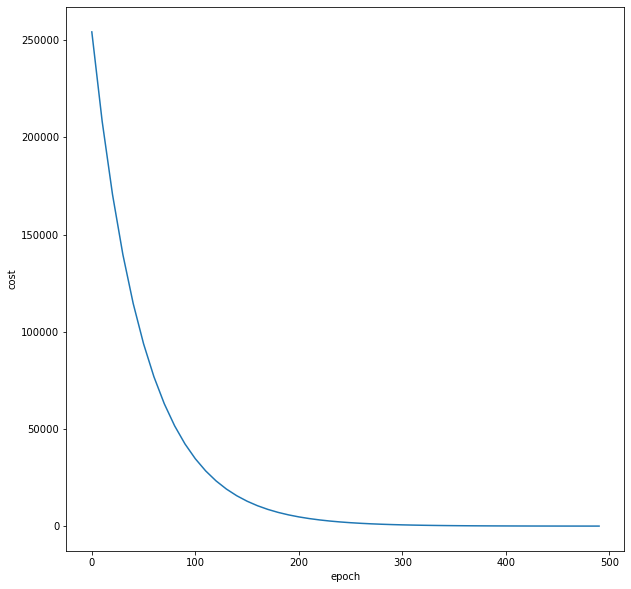

In [25]:
plt.figure(figsize = (10,10))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

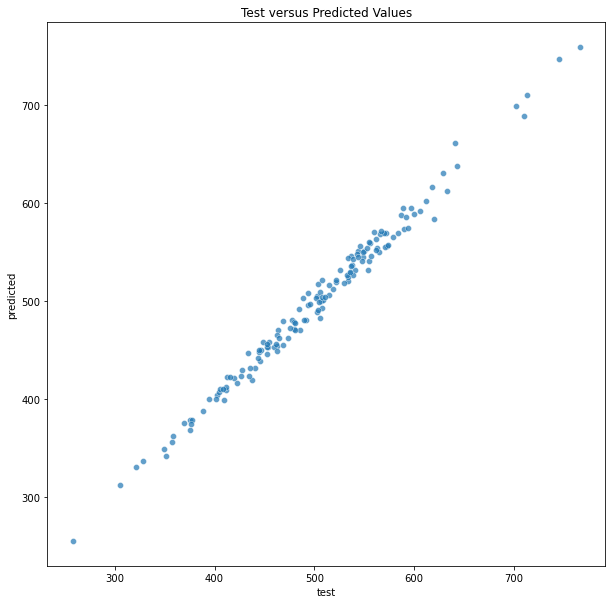

In [26]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred[0,:])
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [27]:
mae = mean_absolute_error(y_test, y_pred[0,:])
mse = mean_squared_error(y_test, y_pred[0,:])
rmse = mean_squared_error(y_test, y_pred[0,:], squared = False)
r2 = r2_score(y_test, y_pred[0,:])
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 7.338263007748179
MSE: 88.560632023617
RMSE: 9.410665865049985
R_squared: 0.9877995219070836


Derivatives help minimize the cost function.
More stable convergence and error gradient than Stochastic Gradient descent.
Can converge at local minima and saddle points

# 7 Stochastic Gradient Descent
<ol type="I">
<li>Implement Stochastic Gradient Descent and train our data set. You must have to use learning_schedule (see example code in pdf as well as the colab link I have shared in #6 above. The parameters should be reasonable and the theta values should be very close to the normal equation</li>
<li>Display the theta values. Are they very close to the sklearn's linear regression?</li>
<li>Also plot step number (in x-axis) against cost(y-axis). See an example from this colab link : https://colab.research.google.com/drive/19_UoIFfIBx-nofDFs7Pw7ZB8gVw5yQLe?usp=sharing (Links to an external site.)</li>
<li>Perform Prediction for the test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
<li>Short Question: What are the benefits and the limitations of using batch gradient descent?</li>
</ol>

In [28]:
cost_list = []
epoch_list = []
predicted_list = []

n_epochs = 200
t0, t1 = 500, 5000 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(5,1) # random initialization
i=0
for epoch in range(n_epochs):
    if i==101:
        i = 0
    random_index = np.random.randint(m)
    #print(random_index)
    xi = XB_train[random_index:random_index+1]
    yi = y_train[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    i += 1

    y_pred = np.dot(theta.T, XB_test.T)
    cost = np.mean(np.square(y_test-y_pred)) # MSE (Mean Squared Error)
        
    if epoch%10==0:
        cost_list.append(cost)
        epoch_list.append(epoch)

theta

array([[ 5.00120749e+02],
       [ 2.60568941e+01],
       [ 3.84859364e+01],
       [-4.92987914e-01],
       [ 6.13292936e+01]])

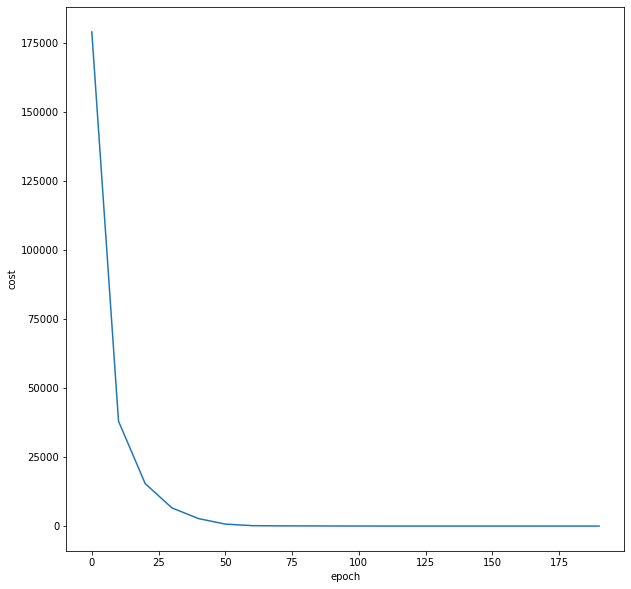

In [29]:
plt.figure(figsize = (10,10))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)


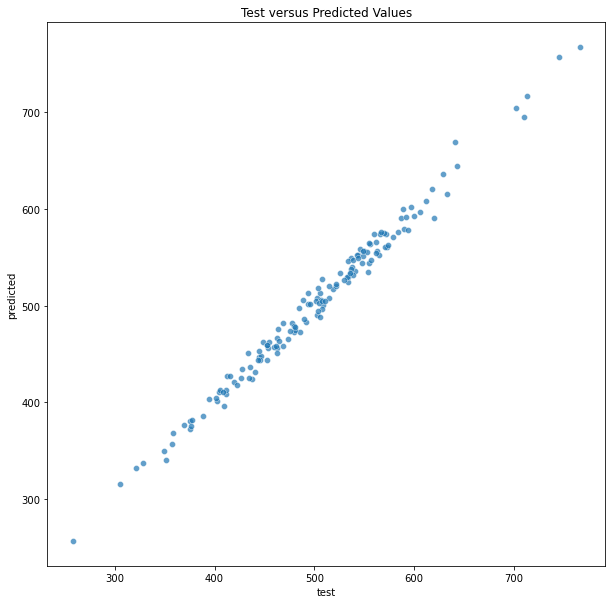

In [30]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred[0,:])
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [31]:
mae = mean_absolute_error(y_test, y_pred[0,:])
mse = mean_squared_error(y_test, y_pred[0,:])
rmse = mean_squared_error(y_test, y_pred[0,:], squared = False)
r2 = r2_score(y_test, y_pred[0,:])
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 7.281177352718996
MSE: 81.2899398066397
RMSE: 9.016093378322992
R_squared: 0.9888011624677553


For larger datasets, it can converge faster as it causes updates to the parameters more frequently.
Due to frequent updates, the steps taken towards the minima are very noisy. This can often lean the gradient descent into other directions.

# 8 SGDRegressor from sklearn
<ol type= "I">
<li>Use sklearn's SGDRegressor to train a model for our data set. Put a reasonable iteration and tolerance and learning steps so that we can get coefficients close to normal equation</li>
<li>Display the theta values. Are they very close to sklearn's linear regression?</li>
<li>Predict for the test data</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([500.35067437]),
 array([25.58500836, 38.67331153, -0.09914352, 61.48881844]))

They are close to Sklearns linear regression.

In [33]:
y_pred = sgd_reg.predict(X_test)

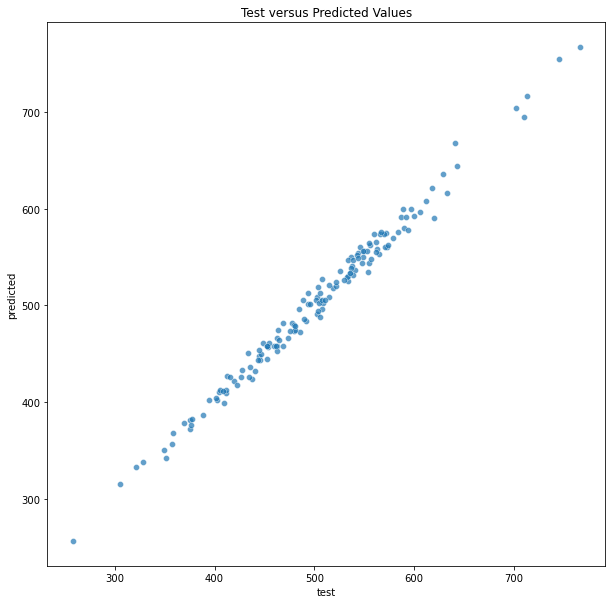

In [34]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred)
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 7.207159003034535
MSE: 79.19536996875892
RMSE: 8.899178050177383
R_squared: 0.9890897190513886


# 9 Mini-batch Gradient Descent
Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.


Easily fits in the memory
It is computationally efficient
Benefit from vectorization
If stuck in local minimums, some noisy steps can lead the way out of them
Average of the training samples produces stable error gradients and convergence

# 10 Polynomial of degree 2
<ol type= "I">
<li>Use sklearn's Polynomial features to degree = 2 on our training and test set</li>
<li>Use linearRegression on the new polynomial features</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [37]:
reg=LinearRegression()
reg.fit(poly_X_train, y_train)

LinearRegression()

In [38]:
y_pred = reg.predict(poly_X_test)

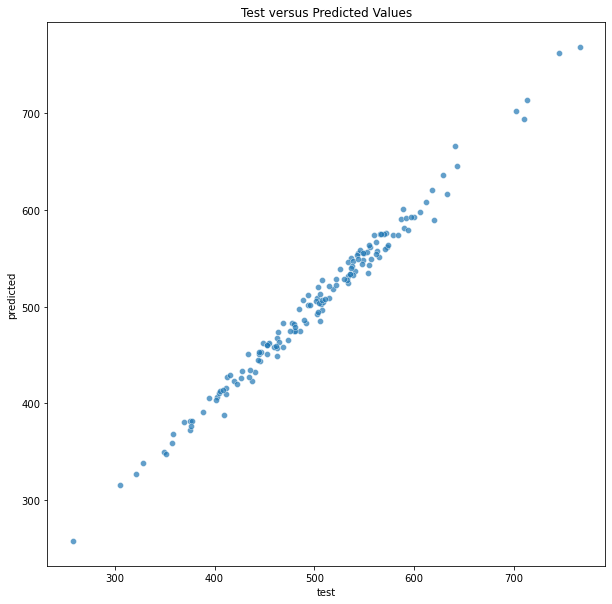

In [39]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred[:,0])
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [40]:
mae = mean_absolute_error(y_test, y_pred[:,0])
mse = mean_squared_error(y_test, y_pred[:,0])
rmse = mean_squared_error(y_test, y_pred[:,0], squared = False)
r2 = r2_score(y_test, y_pred[:,0])
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 7.432195703827286
MSE: 85.34745505512038
RMSE: 9.238368636026621
R_squared: 0.9882421824247091


# 11 Polynomial of degree 3
<ol type= "I">
<li>Use sklearn's Polynomial features to degree = 3 on our training and test set</li>
<li>Use linearRegression on the new polynomial features</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [41]:
poly = PolynomialFeatures(3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [42]:
reg=LinearRegression()
reg.fit(poly_X_train, y_train)

LinearRegression()

In [43]:
y_pred = reg.predict(poly_X_test)

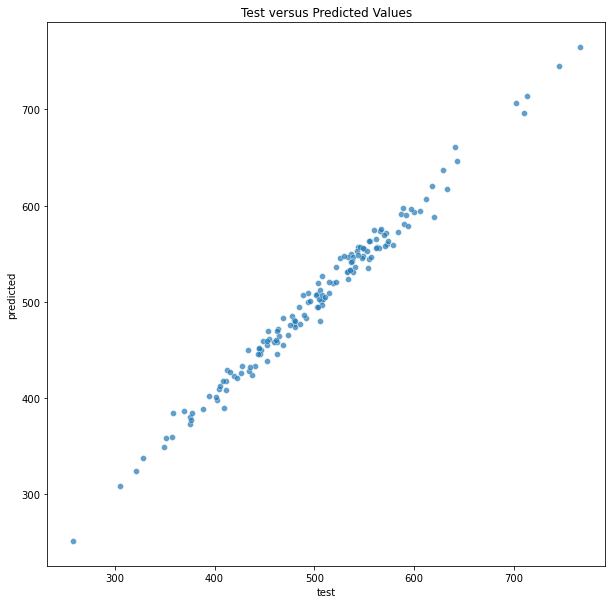

In [44]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred[:,0])
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [45]:
mae = mean_absolute_error(y_test, y_pred[:,0])
mse = mean_squared_error(y_test, y_pred[:,0])
rmse = mean_squared_error(y_test, y_pred[:,0], squared = False)
r2 = r2_score(y_test, y_pred[:,0])
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 7.695801008025619
MSE: 94.96886930852006
RMSE: 9.745197243181897
R_squared: 0.9869166966965791


# 12 Learning Curve
<ol type= "I">
<li>Generate learning curve with linearRegression</li>
<li>Generate learning curve with polynomial regression with degree  = 5</li>
<li>Interpret the result</li>
</ol>

In [46]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    train_errors, pred_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        pred_errors.append(mean_squared_error(y_test , y_test_pred))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(pred_errors), "b-", linewidth = 3, label = "val")
    print("Train Error: {}\nVal Error: {}".format(train_errors[348], pred_errors[348]))

Train Error: 107.11878264719886
Val Error: 79.85787475413264


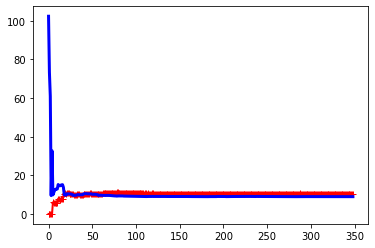

In [47]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_scaled, y)

Train Error: 73.15139658106436
Val Error: 6395.80957778272


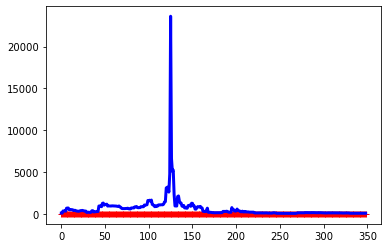

In [48]:
poly = PolynomialFeatures(5)
poly_X = poly.fit_transform(X_scaled)
plot_learning_curves(lin_reg, poly_X, y)

The model with data fitted to a 5 feature Polynomial is showing considerable signs of overfitting, with a much higher validation error than training error.

# 13 Regularization
Explain the purpose of regularization
For the following Regularization method, use the polynomial degree 3 data set

Since the polynomial dataset is prone to overfitting, regularization can help this issue by constraining the weights of the model.

# 14 Ridge Regression
<ol type= "I">
<li>Use sklearn's Ridge to train the data set (use the polynomial degree 3 data set)</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [49]:
poly = PolynomialFeatures(3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [50]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1 , solver= "cholesky")
ridge_reg.fit(poly_X_train , y_train)
y_pred= ridge_reg.predict(poly_X_test)

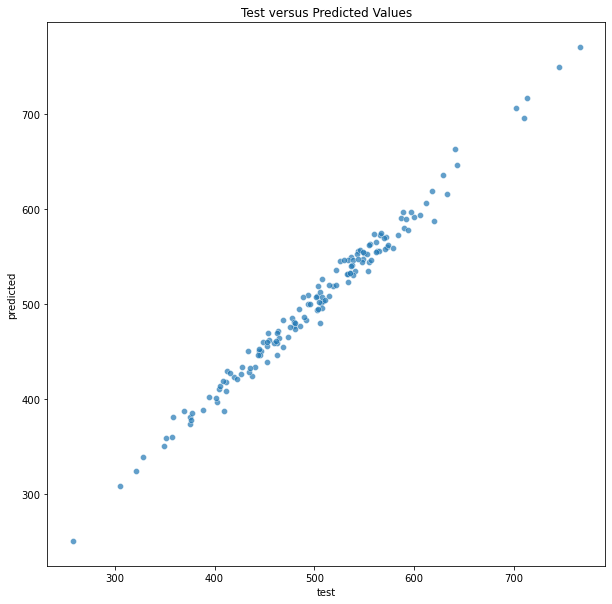

In [51]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred[:,0])
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [52]:
mae = mean_absolute_error(y_test, y_pred[:,0])
mse = mean_squared_error(y_test, y_pred[:,0])
rmse = mean_squared_error(y_test, y_pred[:,0], squared = False)
r2 = r2_score(y_test, y_pred[:,0])
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 7.855335064312291
MSE: 97.6595914733688
RMSE: 9.882286753245364
R_squared: 0.9865460117084953


# 15 SGDRegressor  for Ridge
<ol type= "I">
<li>Use sklearn's SGDRegressor for Ridge Regression</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
</ol>

In [53]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(poly_X_train, y_train.ravel())
y_pred = sgd_reg.predict(poly_X_test)

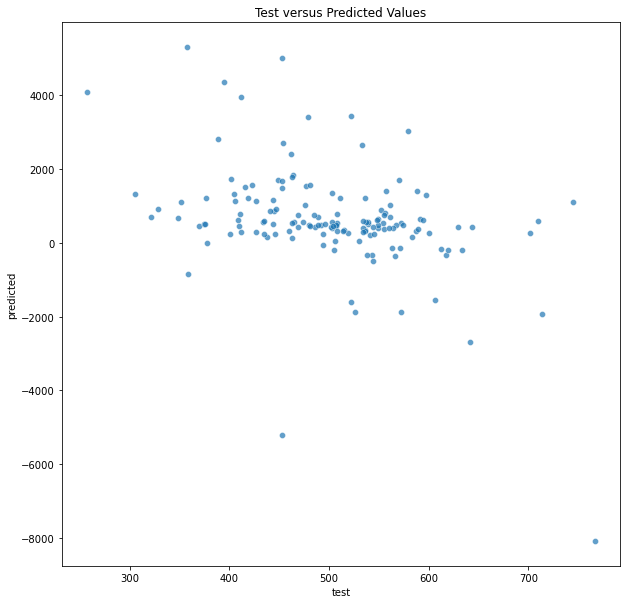

In [54]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred)
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 797.3215945460914
MSE: 2126788.367467365
RMSE: 1458.351249688279
R_squared: -291.99514121167556


# 16 Lasso Regression
<ol type= "I">
<li>Use sklearn's Lasso</li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)</li>
<li>How Lasso perform the regularization and how does that affect the thetas?</li>
</ol>

In [56]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(poly_X_train, y_train)
y_pred = lasso_reg.predict(poly_X_test)

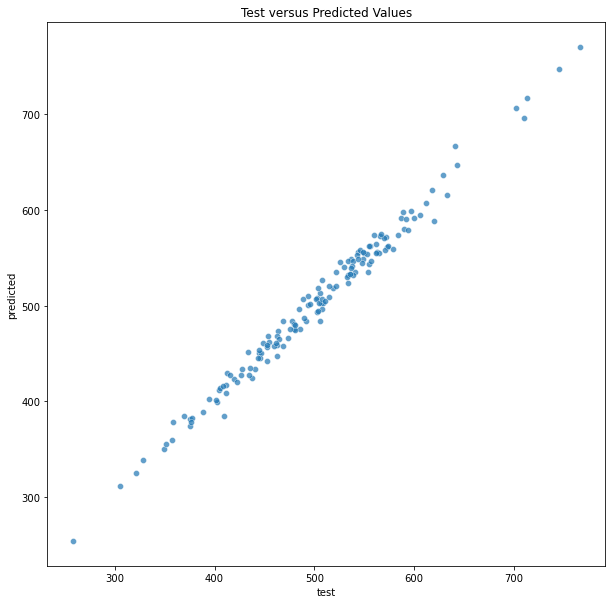

In [57]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred)
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 7.679627716794209
MSE: 93.21215816943548
RMSE: 9.654644383375054
R_squared: 0.987158708471769


# 17 Elastic Net
<ol type= "I">
<li>Use sklearn's ElasticNet </li>
<li>Predict for test set</li>
<li>Generate a scatter plot that shows the Y test in x axis and y predicted in y axis</li>
<li>Use sklearn's metrics to print the value of MAE, MSE, RMSE and R^2  (see documentation of sklearn's metrics)</li>
<li>How ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?</li>
</ol>

In [59]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(poly_X_train, y_train)
y_pred = elastic_net.predict(poly_X_test)

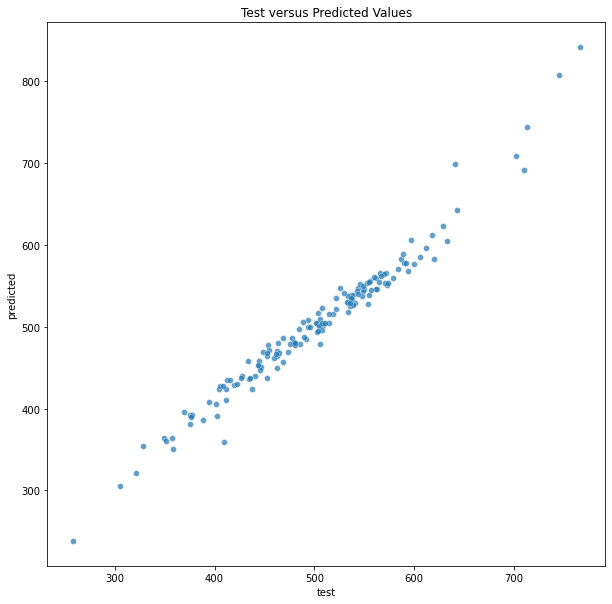

In [60]:
plt.figure(figsize = (10,10))
comparison = pd.DataFrame()
comparison['test']=pd.Series(y_test)
comparison['predicted']=pd.Series(y_pred)
sns.scatterplot(data = comparison, x = "test", y = "predicted", alpha = 0.7).set(title = "Test versus Predicted Values")
plt.show()

In [61]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("MAE: {}\nMSE: {}\nRMSE: {}\nR_squared: {}".format(mae, mse, rmse, r2))

MAE: 11.378641625545777
MSE: 261.6917512822405
RMSE: 16.176889419237572
R_squared: 0.9639482645317565


Elastic net is a mix of Ridge and Lassos regularization terms with a mix ratio of r. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the
number of features is greater than the number of training instances or when several features are
strongly correlated.

# 18 Bonus Question:
In most of the above cases, for example, LinearRegression of sklearn, (Q4 above), we have used scaled data set for training. However, in a real-life scenario, you would like to predict the yearly amount spent for a new instance. The real data will not be scaled. How would you use the model for this case to predict this instance? [35.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961] = ? \\
Write necessary code so that it will predict a reasonable value for the amount spent. This is very close to our first training record.

In [62]:
reg=LinearRegression()
reg.fit(X_train, y_train)
X_test = scaler.transform(np.expand_dims(np.array([35.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961]), axis = 0))
y_pred = reg.predict(X_test)
